# Predicting House prices in California

## Data Import and first Inspection

#### Basically, I am going to import the few libraries I will need, and do some basic import and inspection to get a first glance of the situation and data set. I will go through several rounds of info and describe method, and I will try to find missing values or datas. Finally, I'll use a first vizualisation to get a quick idea of the distribution of the different columns.

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [9]:
df = pd.read_csv('housing.csv')

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Features:

* **longitude:**  geographic coordinate (district´s east-west position)

* **latitude:**  geographic coordinate (district´s north-south position)

* **housing_median_age:** median age of houses in district

* **total_rooms** Sum of all rooms in district

* **total_bedrooms** Sum of all bedrooms in district

* **population:** total population in district

* **households:** total households in district

* **median_income:** median household income in district 

* **median_house_value:** median house value in district

* **ocean_proximity:** District´s proximity to the ocean



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
df.loc[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
df.loc[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [24]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

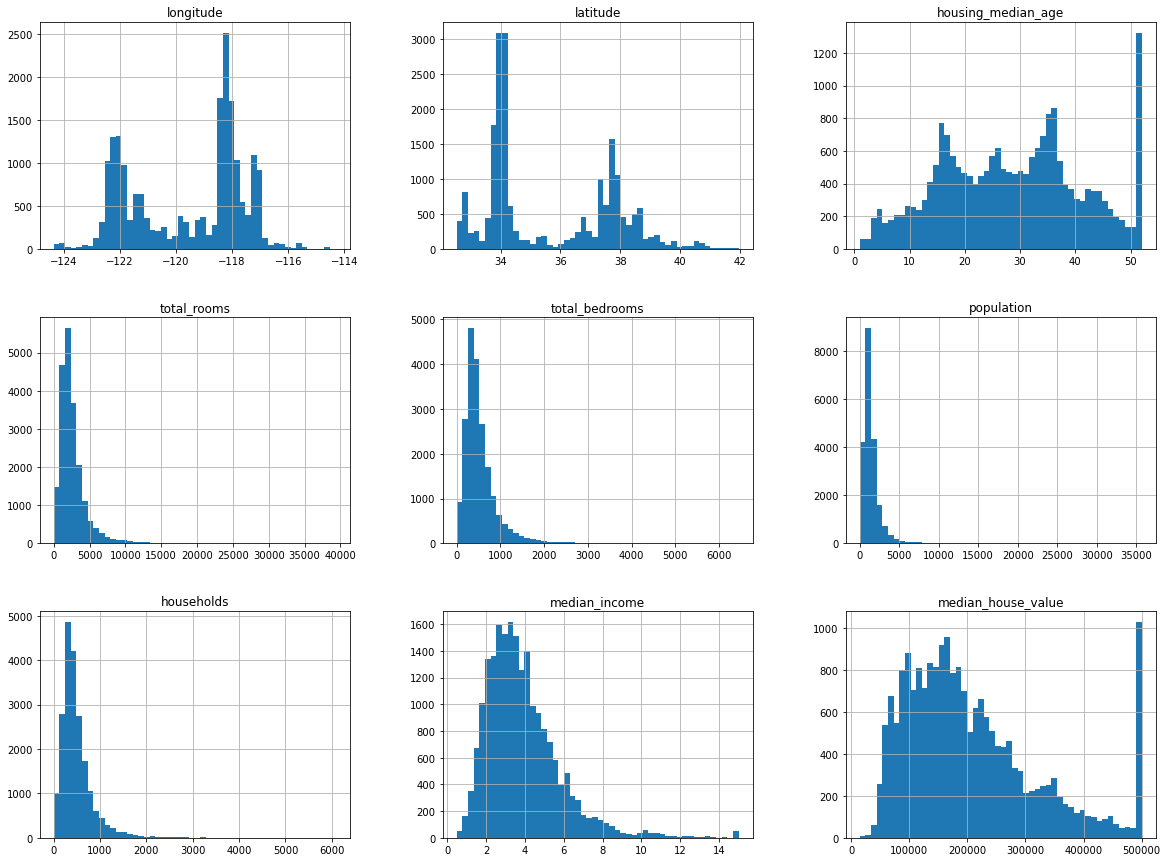

In [25]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

## Data Cleaning and Creating additional Features

#### Here there is not a lot of data to clean given the fact that there are only a few missing values in the total_bedrooms column. To prevent any complex situation I will only remove the rows where there are missing values, even if it has an impact on the precision of my analysis, given the number of rows the impact is quite negligible.

In [26]:
df.dropna(inplace = True)

In [27]:
df['roomers_per_household'] = df.total_rooms.div(df.households)

In [32]:
df.rename(columns = {"roomers_per_household" : "rooms_per_household"}, inplace=True)

In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


##### I am exploring the values to see if there is any extreme value.

In [36]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [38]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

##### As I expected there are some outliers, thus I am going to look for the full row. 

In [43]:
df.loc[[1914,1979,5916,8219],:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


##### Households lack of precision, that's why I am going to calculate the population per household, and the bedroom per rooms

In [50]:
df['pop_per_households'] = df.population.div(df.households)

In [54]:
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)

In [55]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_households,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


In [56]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_households,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Which Factors influence House Prices?

##### An interesting way to look at factor that might influence the house prices is to use graphic representation. 
##### Give a look to correlation could also be another alternative to spot if there are any factors that could have an impact.

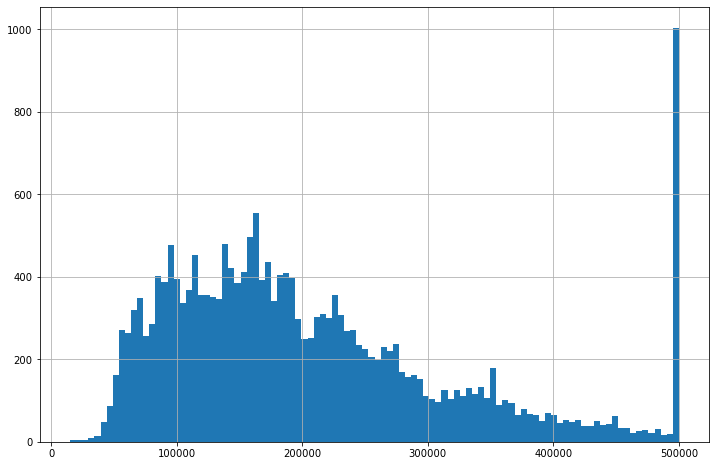

In [58]:
df.median_house_value.hist(bins = 100 , figsize = (12,8))
plt.show()

In [62]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_households    -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

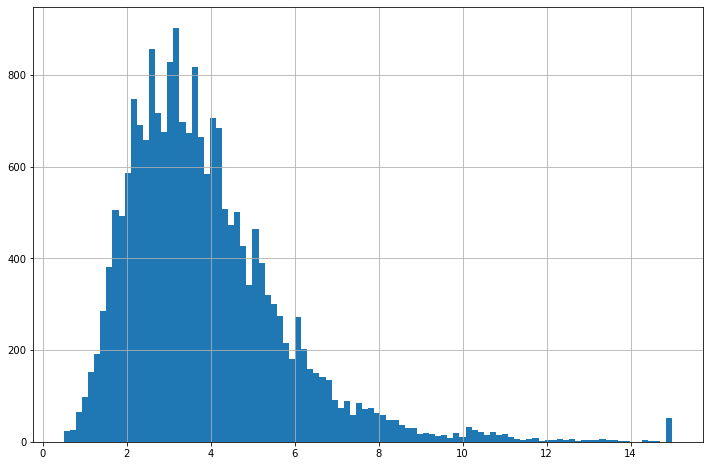

In [64]:
df.median_income.hist(bins = 100, figsize = (12,8) )
plt.show()

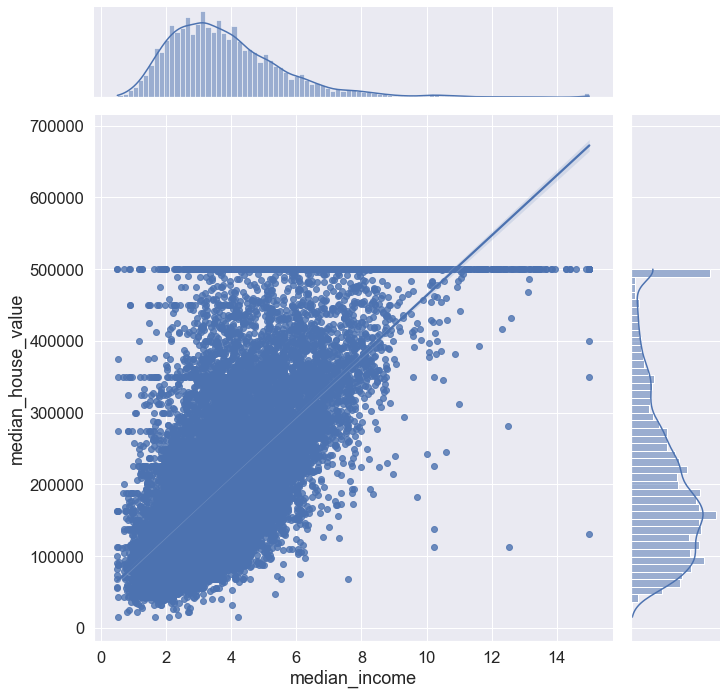

In [69]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x='median_income', y='median_house_value', kind = 'reg', height = 10)
plt.show()

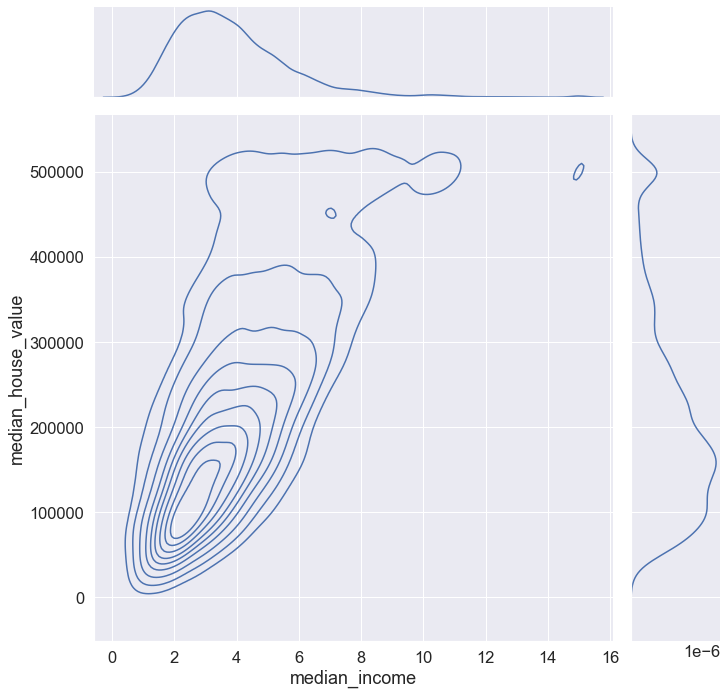

In [77]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x='median_income', y='median_house_value', kind = 'kde', height = 10)
plt.show()

##### Here I am preparing a heatmap representation of the population given their latitude and longitude and then I will use matplotlib to use the picture of California and I will lay my plot over the california.

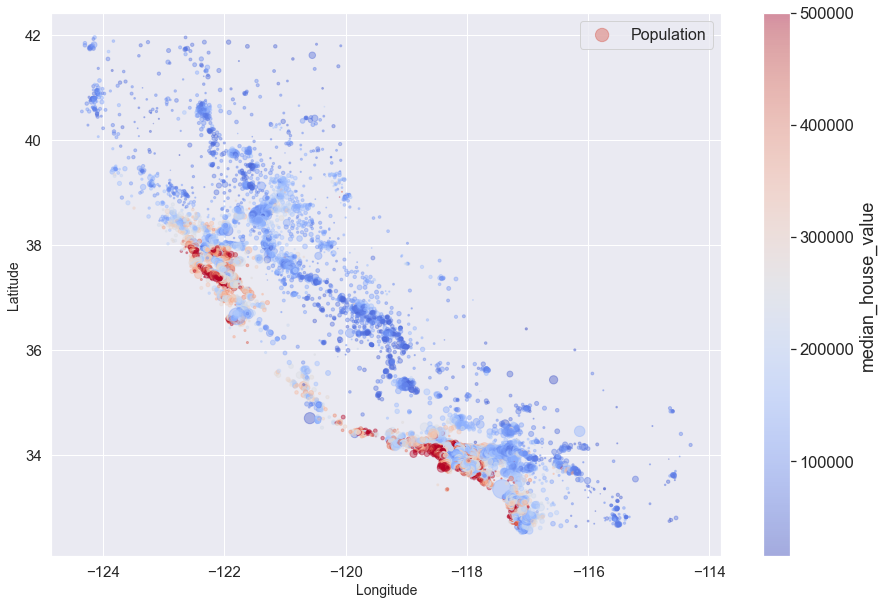

In [86]:
df.plot(kind = 'scatter', x = 'longitude', y='latitude',
       s=df.population/100 , label = 'Population',figsize = (15,10),
       c='median_house_value',cmap='coolwarm',colorbar=True,alpha=0.4,fontsize=15,sharex=False)
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.legend(fontsize = 16)
plt.show()

In [80]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")

In [87]:
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

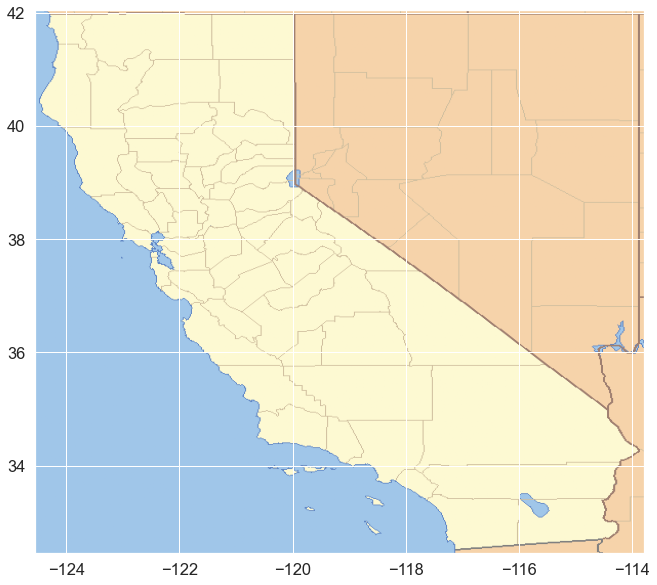

In [92]:
plt.figure(figsize = (15,10))
plt.imshow(california_img, extent = [-124.55,-113.80,32.45,42.05])
plt.show()

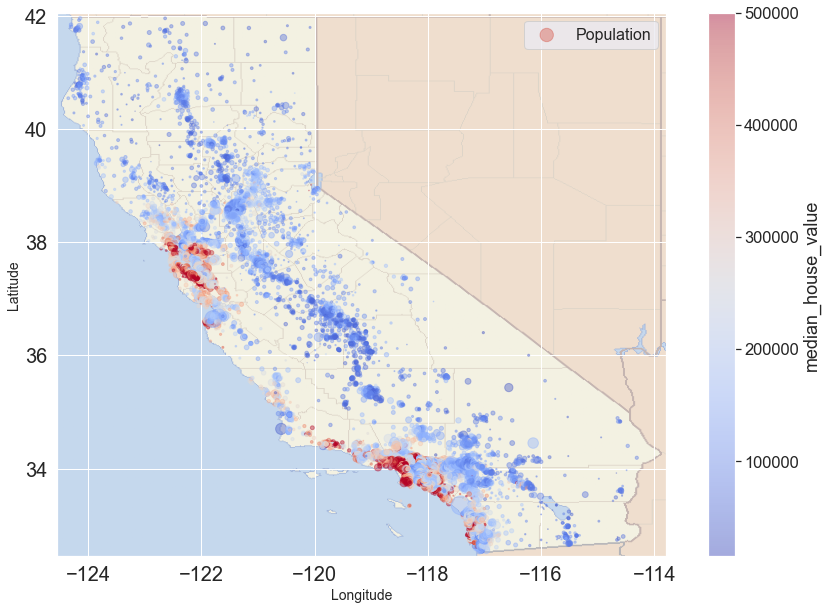

In [100]:
df.plot(kind = 'scatter', x = 'longitude', y='latitude',
       s=df.population/100 , label = 'Population',figsize = (15,10),
       c='median_house_value',cmap='coolwarm',colorbar=True,alpha=0.4,fontsize=20,sharex=False)
plt.imshow(california_img, extent = [-124.55,-113.80,32.45,42.05], alpha = 0.5)
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.legend(fontsize = 16)
plt.show()

##### Basically I have done the graphical representation without considering the geographical position. Now I am going to do several representation using the 'ocea_proximity' parameter.

In [95]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [96]:
df_loc = df[df.ocean_proximity == prox[3]].copy()

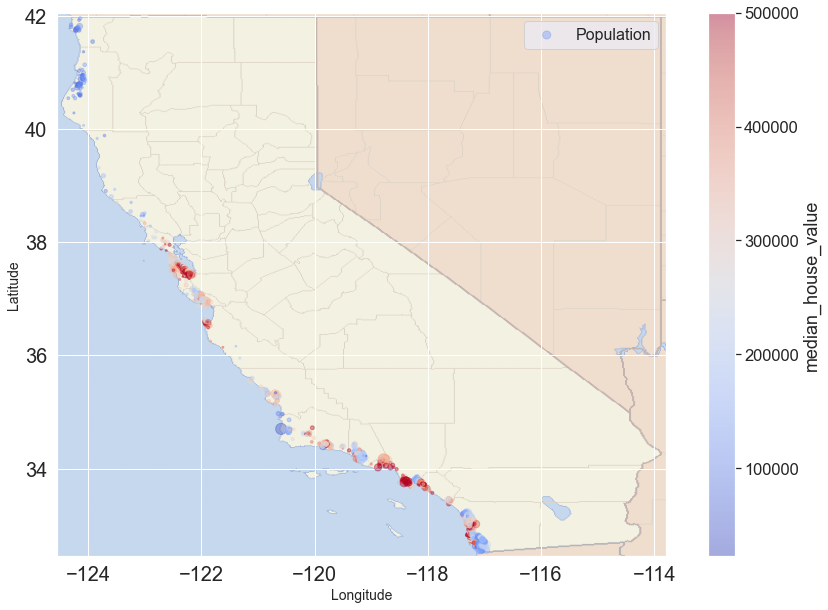

In [99]:
df_loc.plot(kind = 'scatter', x = 'longitude', y='latitude',
       s=df_loc.population/100 , label = 'Population',figsize = (15,10),
       c='median_house_value',cmap='coolwarm',colorbar=True,alpha=0.4,fontsize=20,sharex=False)
plt.imshow(california_img, extent = [-124.55,-113.80,32.45,42.05], alpha = 0.5)
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.legend(fontsize = 16)
plt.show()

In [101]:
df_loc2 = df[df.ocean_proximity == prox[2]].copy()

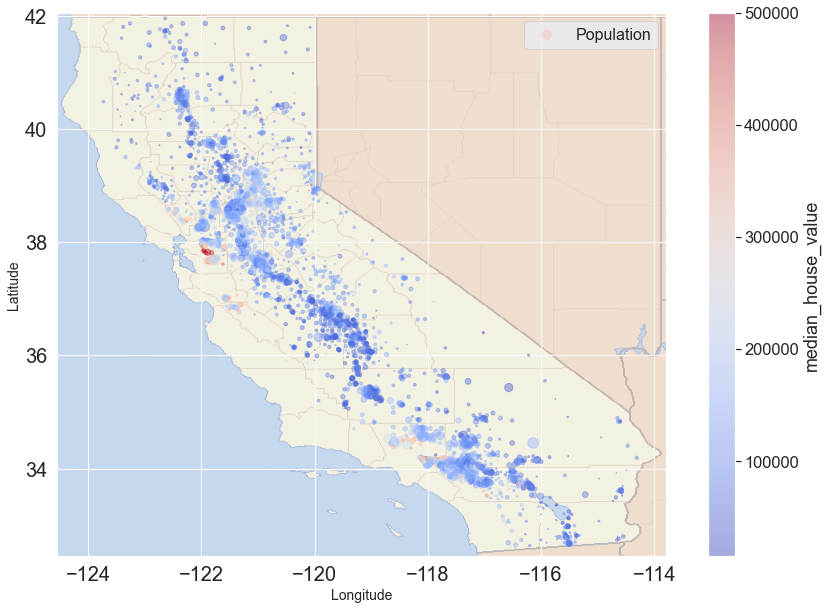

In [102]:
df_loc2.plot(kind = 'scatter', x = 'longitude', y='latitude',
       s=df_loc2.population/100 , label = 'Population',figsize = (15,10),
       c='median_house_value',cmap='coolwarm',colorbar=True,alpha=0.4,fontsize=20,sharex=False)
plt.imshow(california_img, extent = [-124.55,-113.80,32.45,42.05], alpha = 0.5)
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.legend(fontsize = 16)
plt.show()

##### There is no linear relationship between house price , longitude and latitude.

## Advanced Explanatory Data Analyis with Seaborn

##### The income should be the most important feature to forecast house prices.

In [103]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_households,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


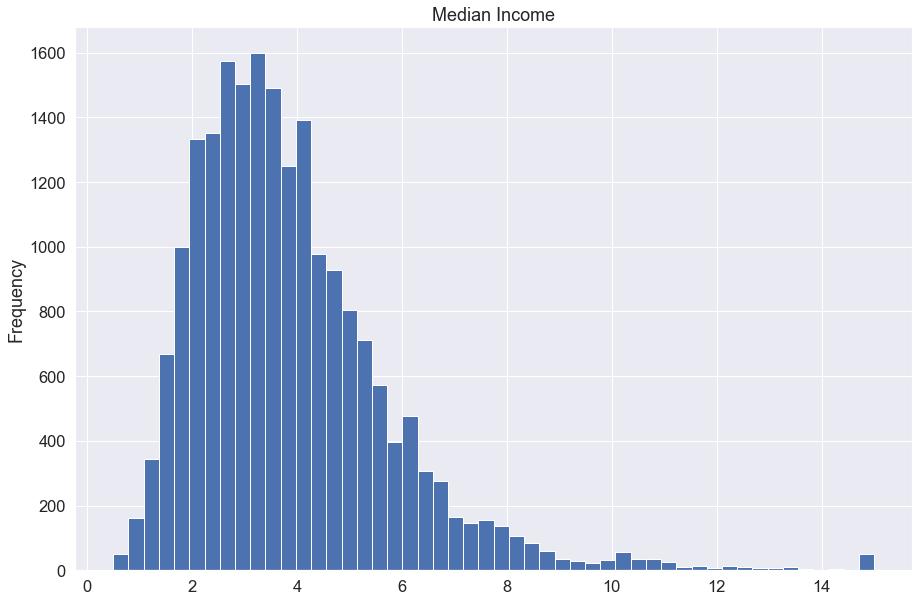

In [106]:
df.median_income.plot(kind = 'hist' , bins = 50, figsize = (15,10))
plt.title('Median Income')
plt.show()

##### I am going to create income category, as followed 'Low', 'Below_average','Above_average','High','Very_high'. I used a simple interval starting from 0 and splitting by 0.25 

In [107]:
pd.qcut(df.median_income, q = [0,0.25,0.5,0.75,0.95,1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [108]:
df['Income_cat'] = pd.qcut(df.median_income, q = [0,0.25,0.5,0.75,0.95,1], labels = ['Low', 'Below_average','Above_average','High','Very_high'] )

In [109]:
df.Income_cat

0            Very_high
1            Very_high
2                 High
3                 High
4        Above_average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: Income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_average' < 'Above_average' < 'High' < 'Very_high']

In [111]:
df.Income_cat.value_counts(normalize=True)

Low              0.250037
Above_average    0.250037
Below_average    0.249988
High             0.199922
Very_high        0.050017
Name: Income_cat, dtype: float64

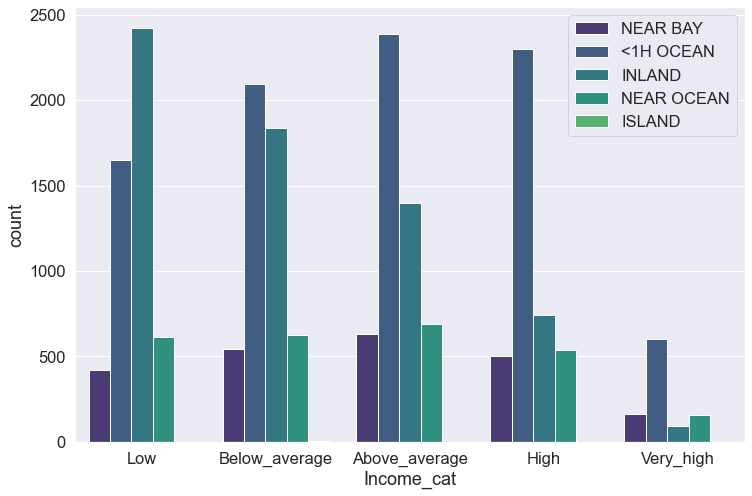

In [113]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5, palette = 'viridis')
sns.countplot(data = df , x = 'Income_cat', hue = 'ocean_proximity')
plt.legend(loc = 1 )
plt.show()

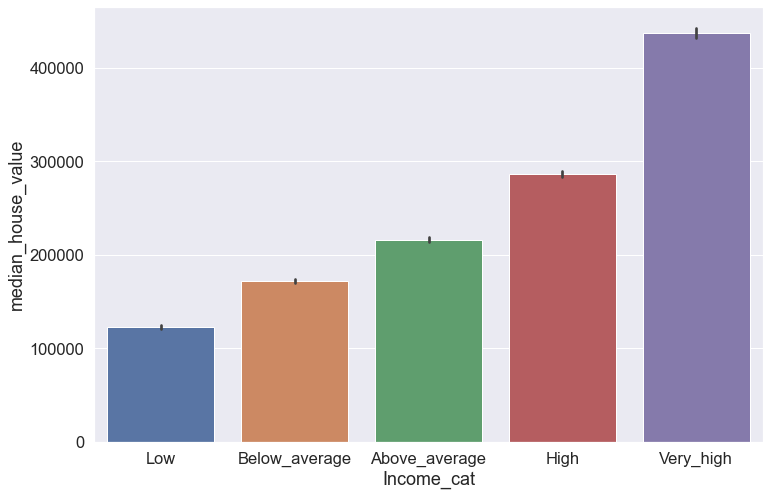

In [114]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df , x  = 'Income_cat', y='median_house_value', dodge = True)
plt.show()

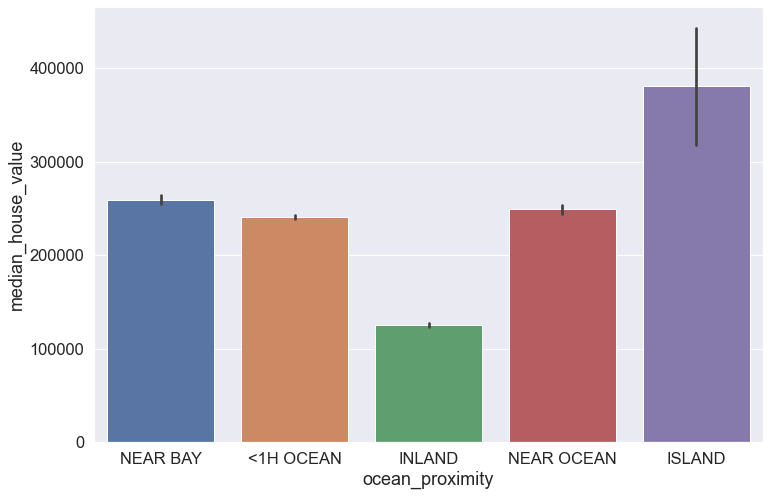

In [115]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df , x  = 'ocean_proximity', y='median_house_value', dodge = True)
plt.show()

In [121]:
matrix = df.groupby(['Income_cat','ocean_proximity']).median_house_value.mean().unstack().drop(columns = 'ISLAND')

In [122]:
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
Income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_average,197236.013829,115124.088283,220196.177656,208665.190096
Above_average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very_high,439784.235489,347571.736842,451015.078788,468739.723270


In [123]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
Income_cat,,,,
Low,161337,84820,155122,148027
Below_average,197236,115124,220196,208665
Above_average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very_high,439784,347571,451015,468739


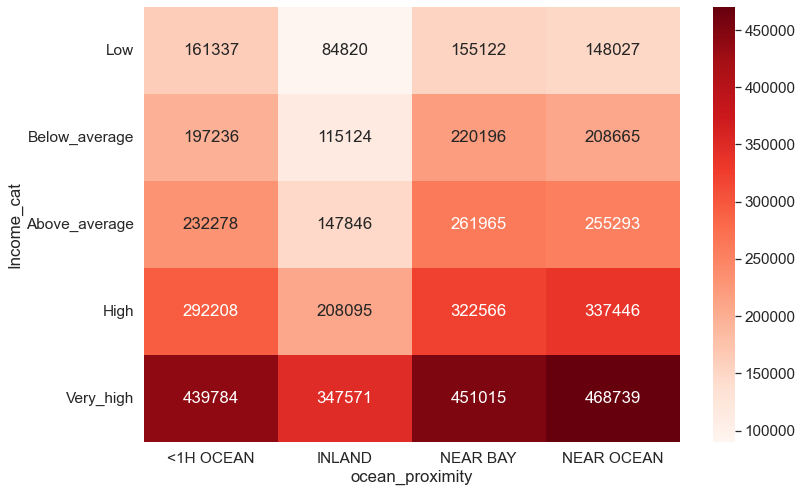

In [124]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(matrix.astype('int'),vmin = 90000 , vmax = 470000 , fmt = 'd', annot = True , cmap = 'Reds' )
plt.show()

1. To conclude I can see that the **Inland price** whatever the income category is, still remains the **lowest** among the 4. I can conclude about the **relationship between the proximity to the ocean and the house prices**.

## Feature Engineering - Part 1

I am preparing the datas and different columns for the machine learning. So I must provide proper formats and avoid numerical features which have **different scales** (cf 'population' and 'median_income')

In [127]:
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [126]:
features = df.drop(columns = ['median_house_value'])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_households,bedrooms_per_room,Income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892,Low


In [128]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  pop_per_households   20433 non-null  float64 
 11  bedrooms_per_room    20433 non-null  float64 
 12  Income_cat           20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.6+ MB


In [129]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [130]:
import scipy.stats as stats

In [131]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))

In [134]:
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12


In [133]:
pd.options.display.float_format = '{:.2f}'.format

In [136]:
feat1.agg(["mean",'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Finally, I have applied the Z Score to normalize every numerical data for the further machine learning processes. Here I have used the scipy library combined the pandas one.

## Feature Engineering - Part 2

In [137]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [138]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

Now I am going to transform this feature column as a numeric one by using dummy variables. 

In [139]:
dummies = pd.get_dummies(features.ocean_proximity)

In [141]:
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


Now I am concatening every Data Frame I have created in a single one. I am merging every features and I keep the income_cat one as well. I avoid any column repetitions to avoid any colinearity problems when I will be doing the linear regression and so on.

In [143]:
features = pd.concat([feat1, dummies,df.Income_cat], axis = 1)

In [145]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


## Splitting the Data into Train and Test Set

In [146]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


Now I am going to train the machine learning model by using a training set and then I will use a test set to try out its performances (Generalizing and forecasting).

It is common to use the following repartition training = 80% and testing = 20%. Thus I will use those basics.

In [147]:
test_size = 0.2

In [148]:
X_test = features.sample(frac = test_size, random_state = 123)

In [149]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


In [153]:
X_test.Income_cat.value_counts(normalize=True)

Above_average   0.25
Below_average   0.25
Low             0.25
High            0.20
Very_high       0.05
Name: Income_cat, dtype: float64

In [154]:
features.Income_cat.value_counts(normalize=True)

Low             0.25
Above_average   0.25
Below_average   0.25
High            0.20
Very_high       0.05
Name: Income_cat, dtype: float64

I wanted to make sure that the incomes categories are correctly distributed to avoid any future bias if one or more categories are over or under represented.

The test set has been created. Now I am going to create the training set based on the X_test.index.

In [155]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [156]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [157]:
X_train.Income_cat.value_counts(normalize=True)

Low             0.25
Below_average   0.25
Above_average   0.25
High            0.20
Very_high       0.05
Name: Income_cat, dtype: float64

To make sure that the X_train set is proper to be used I am going to shuffle the row orders.

In [159]:
X_train = X_train.sample(frac=1,random_state = 123)

In [160]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_households,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
17697,-1.13,0.77,0.35,-0.70,-0.68,-0.23,-0.62,0.02,-0.47,0.13,0.19,1,0,0,0,0,Above_average
17295,-0.02,-0.56,-1.00,0.01,-0.35,-0.56,-0.49,2.71,1.26,-0.05,-1.14,1,0,0,0,0,Very_high
15779,-1.42,1.00,1.86,-1.09,-1.11,-1.12,-1.23,-0.00,1.34,0.21,1.21,0,0,0,1,0,Above_average
20418,0.35,-0.68,-0.13,-0.32,-0.66,-0.61,-0.67,1.53,1.00,-0.01,-1.34,1,0,0,0,0,High
3619,0.56,-0.65,0.51,-0.48,-0.51,0.05,-0.39,-0.09,-0.37,0.11,-0.14,1,0,0,0,0,Above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12877,-0.90,1.42,-0.92,1.02,1.23,0.83,1.39,-0.74,-0.28,-0.07,0.07,0,1,0,0,0,Low
13496,1.11,-0.69,0.19,-0.47,-0.44,-0.33,-0.43,-0.88,-0.26,0.01,0.13,0,1,0,0,0,Low
13669,1.16,-0.73,0.11,0.16,0.16,0.32,0.19,-0.75,-0.09,0.00,-0.17,0,1,0,0,0,Low
4193,0.66,-0.71,0.98,-0.65,-0.56,-0.55,-0.52,-0.36,-0.56,-0.04,0.61,1,0,0,0,0,Below_average


In [161]:
X_train.drop(columns = ['Income_cat'], inplace = True)

In [162]:
X_test.drop(columns = ['Income_cat'], inplace = True)

In [165]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

**To be remembered : label is variable containing the median_house_value.** 

In [167]:
y_train

17697   178600.00
17295   500001.00
15779   350000.00
20418   392900.00
3619    176000.00
           ...   
12877   103300.00
13496    72700.00
13669    85800.00
4193    204200.00
5287    500001.00
Name: median_house_value, Length: 16346, dtype: float64

## Training the ML Model (Random Forest Regressor)

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
forest_reg = RandomForestRegressor(random_state= 42 , n_estimators = 500, 
                                   max_features = 'sqrt',max_depth = 75 , min_samples_split = 2)

In [172]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [173]:
forest_reg.score(X_train,y_train)

0.9758738760806334

In [174]:
from sklearn.metrics import mean_squared_error

In [175]:
pred = forest_reg.predict(X_train)
pred

array([176560.   , 485530.44 , 312034.42 , ...,  87556.   , 204307.6  ,
       482582.648])

In [177]:
forest_mse = mean_squared_error(y_train, pred)

In [178]:
forest_rmse = np.sqrt(forest_mse)

In [180]:
forest_rmse

18013.67265857345

**Our model fits the data pretty well.**

## Evaluating the Model on the Test Set

In [181]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [182]:
forest_reg.score(X_test, y_test)

0.8249642383218201

In [183]:
pred = forest_reg.predict(X_test)
pred

array([220000.404, 128899.   ,  69548.8  , ..., 225832.602, 325015.224,
       268814.002])

In [184]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47373.83643457809

In [185]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
14354,101800.00,220000.40
12908,213000.00,128899.00
19545,58800.00,69548.80
12188,111300.00,179130.01
14786,174100.00,158558.80
...,...,...
10262,272200.00,294932.20
3614,175900.00,180668.40
19296,215900.00,225832.60
5826,326100.00,325015.22


In [186]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

14354   118200.40
12908    84101.00
19545    10748.80
12188    67830.01
14786    15541.20
           ...   
10262    22732.20
3614      4768.40
19296     9932.60
5826      1084.78
15383    22686.00
Length: 4087, dtype: float64

In [187]:
mae = ae.mean()
mae

31757.83835086861

## Feature Importance

In [ ]:
forest_reg.feature_importances_

In [ ]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [ ]:
feature_imp

In [ ]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()